# Practice
![](https://media.giphy.com/media/J9UXcyVW6OYN2fH0Sr/giphy.gif)

In [2]:
# import the pandas and plotly express libraries
import pandas as pd
import plotly.express as px

### Effort 1 - Joining data!

You're going to be working with two datasets. `book_info.csv` which has basic information about books:

- Book ID
- Name
- Year
- Author
- Genre

and a second dataset you will be joining with information about book metrics, found in `book_metrics.csv`:

- ID
- User Rating
- Reviews
- Price

Load `book_info.csv` as `book_info` and `book_metrics.csv` as `book_metrics` in pandas. Preview each DataFrame.

In [3]:
# Load the 'book_info.csv' file from the datasets folder 
# save this as book_info

book_info = pd.read_csv('datasets/book_info.csv')

# preview the DataFrames
book_info.head()

,Book ID,Name,Author,Year,Genre
0,651ccf32-4ba0-4b00-a01b-346c7119d707,10-Day Green Smoothie Cleanse,JJ Smith,2016,Non Fiction
1,1f69e5dc-47c7-48ce-93a8-faad875517d2,11/22/63: A Novel,Stephen King,2011,Fiction
2,06acc119-0350-4ef3-a0db-68106d508f96,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,2018,Non Fiction
3,31db3672-7158-4dab-b20a-0930534fe007,1984 (Signet Classics),George Orwell,2017,Fiction
4,fd57b9be-30a4-46c4-990a-1be3f9cf19fb,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,2019,Non Fiction


In [4]:
# Load the 'book_metrics.csv' file from the datasets folder 
# save this as book_metrics

book_metrics = pd.read_csv('datasets/book_metrics.csv')

# preview the DataFrames
book_metrics.head()

,ID,User Rating,Reviews,Price
0,651ccf32-4ba0-4b00-a01b-346c7119d707,4.7,17350,8.0
1,1f69e5dc-47c7-48ce-93a8-faad875517d2,4.6,2052,22.0
2,06acc119-0350-4ef3-a0db-68106d508f96,4.7,18979,15.0
3,31db3672-7158-4dab-b20a-0930534fe007,4.7,21424,6.0
4,fd57b9be-30a4-46c4-990a-1be3f9cf19fb,4.8,7665,12.0


Perform an inner join of the two DataFrames based on the ID.

In [5]:
# merge the dataframes. save the new dataframe as 'df'
df = pd.merge(book_info, book_metrics, left_on='Book ID', right_on='ID', how='inner')

# preview merged dataframe
df.head()

,Book ID,Name,Author,Year,Genre,ID,User Rating,Reviews,Price
0,651ccf32-4ba0-4b00-a01b-346c7119d707,10-Day Green Smoothie Cleanse,JJ Smith,2016,Non Fiction,651ccf32-4ba0-4b00-a01b-346c7119d707,4.7,17350,8.0
1,1f69e5dc-47c7-48ce-93a8-faad875517d2,11/22/63: A Novel,Stephen King,2011,Fiction,1f69e5dc-47c7-48ce-93a8-faad875517d2,4.6,2052,22.0
2,06acc119-0350-4ef3-a0db-68106d508f96,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,2018,Non Fiction,06acc119-0350-4ef3-a0db-68106d508f96,4.7,18979,15.0
3,31db3672-7158-4dab-b20a-0930534fe007,1984 (Signet Classics),George Orwell,2017,Fiction,31db3672-7158-4dab-b20a-0930534fe007,4.7,21424,6.0
4,fd57b9be-30a4-46c4-990a-1be3f9cf19fb,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,2019,Non Fiction,fd57b9be-30a4-46c4-990a-1be3f9cf19fb,4.8,7665,12.0


Delete the redundant `ID` column.

In [6]:
# delete the 'ID' column
df = df.drop(columns=['ID'])

How many rows are there with missing data?

In [7]:
# Use info() to examine for missing rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book ID      550 non-null    object 
 1   Name         550 non-null    object 
 2   Author       550 non-null    object 
 3   Year         550 non-null    int64  
 4   Genre        550 non-null    object 
 5   User Rating  550 non-null    float64
 6   Reviews      550 non-null    int64  
 7   Price        549 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 38.7+ KB


Drop row(s) with missing data.

In [8]:
# Drop row(s) with missing data
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 549
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book ID      549 non-null    object 
 1   Name         549 non-null    object 
 2   Author       549 non-null    object 
 3   Year         549 non-null    int64  
 4   Genre        549 non-null    object 
 5   User Rating  549 non-null    float64
 6   Reviews      549 non-null    int64  
 7   Price        549 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 38.6+ KB


Examine the statistical summaries of the numerical columns

In [9]:
df.describe()

,Year,User Rating,Reviews,Price
count,549.000000,549.000000,549.000000,549.000000
mean,2014.005464,4.618761,11952.025501,13.103825
std,3.165445,0.226995,11741.793694,10.851779
min,2009.000000,3.300000,37.000000,0.000000
25%,2011.000000,4.500000,4028.000000,7.000000
50%,2014.000000,4.700000,8580.000000,11.000000
75%,2017.000000,4.800000,17323.000000,16.000000
max,2019.000000,4.900000,87841.000000,105.000000


### Effort 2 - Aggregate All the data!

Has there been an inflation in ratings? 

Group the rows by publication year, then obtain the average User Rating of each year.

In [10]:
# Calculate the average user rating by year
df.groupby('Year').agg({'User Rating': 'mean'})

,User Rating
Year,
2009,4.584000
2010,4.558000
2011,4.561224
2012,4.532000
2013,4.554000
2014,4.622000
2015,4.648000
2016,4.678000
2017,4.660000


What different types of Genres are there, and how many rows of each genre are there?

In [11]:
# Examine the number of rows of data for each genre
df['Genre'].value_counts()

Non Fiction    310
Fiction        239
Name: Genre, dtype: int64

Examine the average User Rating, Reviews, and Price by Genre

In [12]:
# Calculate the average User Rating, Reviews, and Price for each genre
aggregations = {
    'User Rating': 'mean',
    'Reviews' : 'mean',
    'Price' : 'mean'
}
df.groupby('Genre').agg(aggregations)

,User Rating,Reviews,Price
Genre,,,
Fiction,4.649372,15696.514644,10.849372
Non Fiction,4.595161,9065.145161,14.841935


Examine the average Reviews and Price by Year

In [14]:
# Calculate the average Reviews and Price by Year
aggregations = {
    'Reviews' : 'mean',
    'Price' : 'mean'
}

df.groupby('Year').agg(aggregations)

,Reviews,Price
Year,,
2009,4710.120000,15.400000
2010,5479.620000,13.480000
2011,8008.122449,15.183673
2012,13090.920000,15.300000
2013,13098.140000,14.600000
2014,15859.940000,14.640000
2015,14233.380000,10.420000
2016,14196.000000,13.180000
2017,12888.400000,11.380000


Create a line chart of the average number of reviews by year. Is there an identifiable trend?

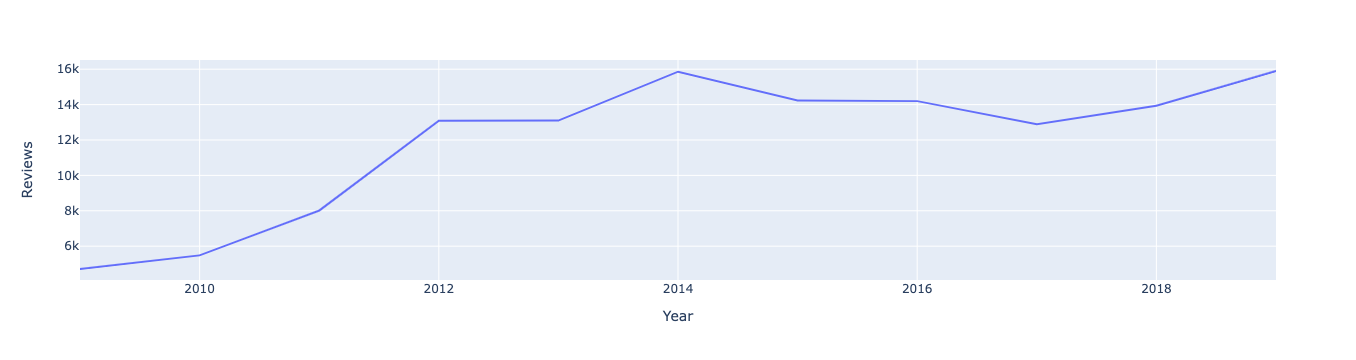

In [25]:
# Create a line chart of the average number of reviews by year
# hint: save the query from the previous cell into a new variable
# and call the x= new_df.index so that the years show up in the chart 

by_year = df.groupby('Year').agg(aggregations)

px.line(by_year, x=by_year.index, y='Reviews')

Create a line chart of the average book price by year. Is there an identifiable trend?

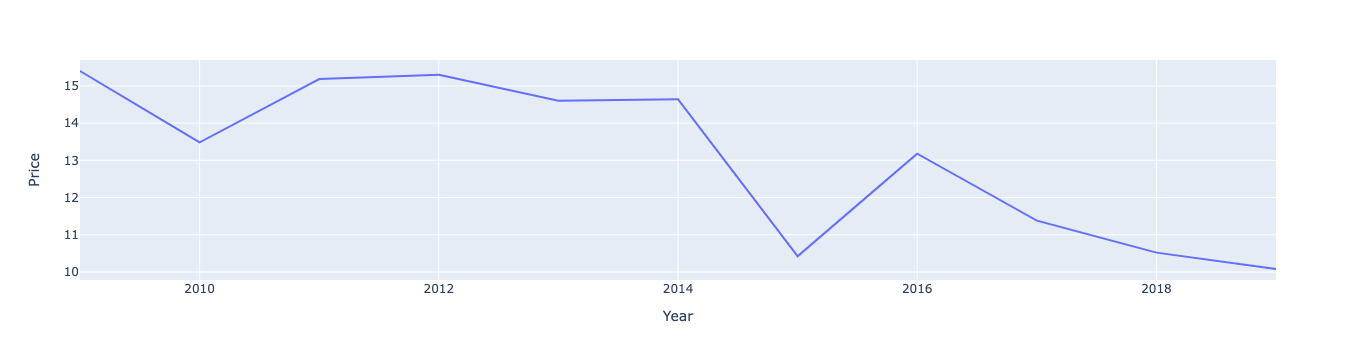

In [24]:
# Create a line chart of the average book price by year
# hint: use the dataframe from the previous cell 
# and call the x= new_df.index so that the years show up in the chart 

px.line(by_year, x=by_year.index, y='Price')

## Level Up

This time, perform a union on two datasets. `books1.csv` contains the same books data from years 2009 through 2014, and `books2.csv` contains data from years 2015 through 2019. Load the two datasets, merge them using `pd.concat()`, and preview the result.

In [30]:
# Load the first dataset
df1 = pd.read_csv('datasets/books1.csv')
df1.head()

,Book ID,Name,Author,Year,Genre,User Rating,Reviews,Price
0,b72bc46f-e1d1-45d2-9cc4-2cfb7f67f6d2,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,2009,Non Fiction,4.8,3828,15.0
1,779602cb-df53-4330-8eb7-ef8affea45e8,"I, Alex Cross",James Patterson,2009,Fiction,4.6,1320,7.0
2,0aa454ba-f0bc-48e0-ba6f-2f2e60f12f4a,The Twilight Saga Collection,Stephenie Meyer,2009,Fiction,4.7,3801,82.0
3,6013493d-d39c-4714-930e-d981aa070f0d,Going Rogue: An American Life,Sarah Palin,2009,Non Fiction,4.6,1636,6.0
4,dc77f750-637a-40e9-a111-3b0db64b3758,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,2009,Fiction,4.8,3837,15.0


In [31]:
# Load the second dataset
df2 = pd.read_csv('datasets/books2.csv')
df2.head()

,Book ID,Name,Author,Year,Genre,User Rating,Reviews,Price
0,6bf26c9f-252d-4387-941b-303ae5b737e9,"Oh, the Places You'll Go!",Dr. Seuss,2015,Fiction,4.9,21834,8.0
1,e03a8072-ddf0-4381-b818-70633f0ee298,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,2015,Fiction,4.8,10922,5.0
2,5c50ce67-3712-4535-a54c-13cdb9024266,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,2015,Non Fiction,4.5,22641,11.0
3,731d8ac4-6643-495c-9051-196cb77f616c,The Girl on the Train,Paula Hawkins,2015,Fiction,4.1,79446,18.0
4,dd1f832e-b0c0-4c73-983a-90bcba490e09,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,2015,Non Fiction,4.7,23308,6.0


In [32]:
# Join the two datasets
# note: you will NOT use the merge method 
new_df = pd.concat([df1, df2])
new_df.head()

,Book ID,Name,Author,Year,Genre,User Rating,Reviews,Price
0,b72bc46f-e1d1-45d2-9cc4-2cfb7f67f6d2,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,2009,Non Fiction,4.8,3828,15.0
1,779602cb-df53-4330-8eb7-ef8affea45e8,"I, Alex Cross",James Patterson,2009,Fiction,4.6,1320,7.0
2,0aa454ba-f0bc-48e0-ba6f-2f2e60f12f4a,The Twilight Saga Collection,Stephenie Meyer,2009,Fiction,4.7,3801,82.0
3,6013493d-d39c-4714-930e-d981aa070f0d,Going Rogue: An American Life,Sarah Palin,2009,Non Fiction,4.6,1636,6.0
4,dc77f750-637a-40e9-a111-3b0db64b3758,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,2009,Fiction,4.8,3837,15.0
